In [28]:
import cvxpy as cp
import numpy as np
import pandas as pd
import yaml
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

In [29]:
# load the config file
with open("config.yaml", "r") as stream:
    config = yaml.safe_load(stream)
    

In [30]:
# Load the prices dataframe
prices = pd.read_csv(config["Prices_data"]["save_path"], index_col=0)

In [31]:
returns = prices.pct_change()
# replace inf values with nan
returns.replace([np.inf, -np.inf], np.nan, inplace=True)
returns.fillna(0, inplace=True)

# Take the mean by month
returns.index = pd.to_datetime(returns.index)
returns = returns.resample("M").mean()

# Calculate the mean and std for each asset
mean_returns = returns.mean()
std_returns = returns.std() 

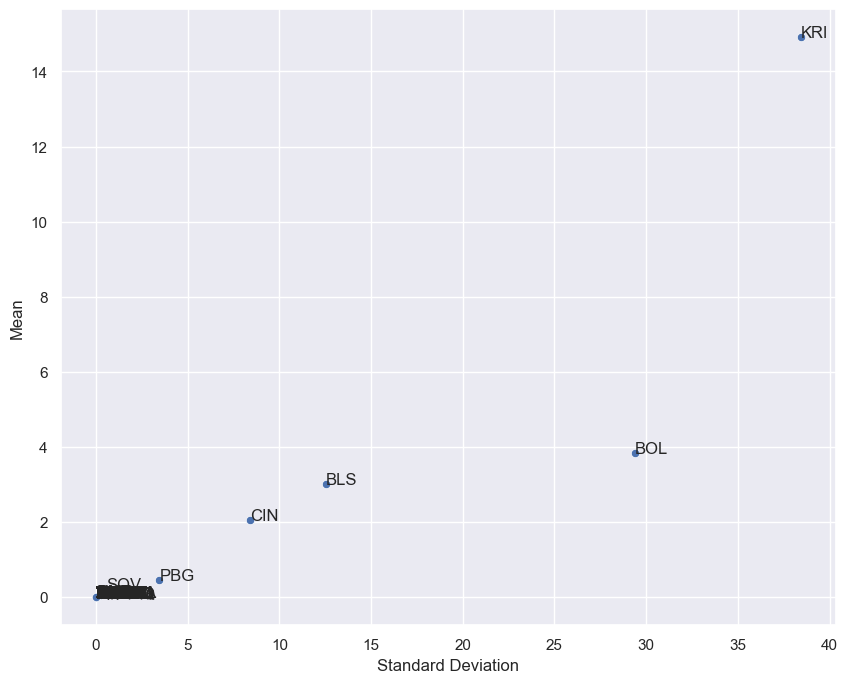

In [36]:
# Plot a scatter plot of the mean and std of the assets using seaborn using labels for the points
plt.figure(figsize=(10, 8))
sns.scatterplot(x=std_returns, y=mean_returns)
for i in range(len(mean_returns)):
    plt.text(std_returns[i], mean_returns[i], mean_returns.index[i])
plt.xlabel("Standard Deviation")
plt.ylabel("Mean")

# Save the plot
plt.savefig("graphs/mean_std_plot.png")

<Axes: xlabel='Date'>

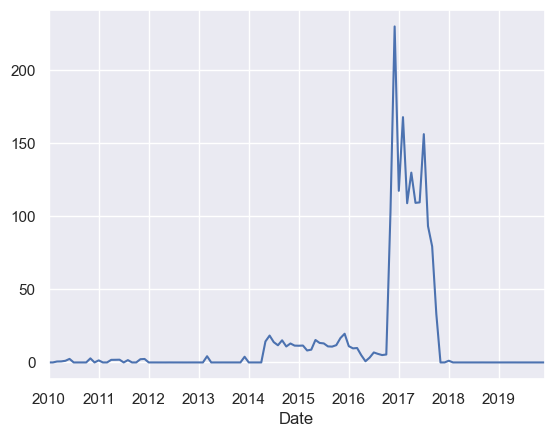

In [34]:
returns["KRI"].plot()

<Axes: xlabel='Date'>

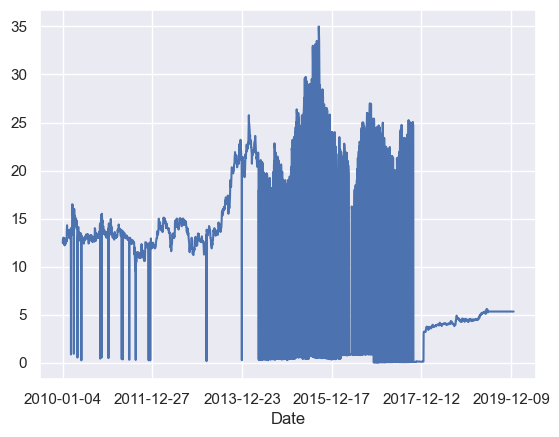

In [35]:
prices["KRI"].plot()